In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import biographs as bg

import networkx as nx
import graph_tool.all as gt

In [2]:
from main_functions import *

In [3]:
pd.set_option('display.max_rows', 1000)

In [4]:
figures_path = "../figures"

In [12]:
# Import processed functional data as DataFrames, all files have ordered AA list as index, positions as columns
# Save data in functional_data
functional_data = dict()
for protein in proteins:
    csv_file = os.path.join('data', f'functional_{protein}.csv')
    functional_data[protein] = pd.read_csv(csv_file, index_col=0, header=0)

In [8]:
thresholds = [round(i, 1) for i in np.linspace(3, 10, 71)]
sample_thresholds = [round(i, 1) for i in np.linspace(3, 10, 8)]

# Get list of SSP that maximize accuracy

In [9]:
predictions = GetList(protein, 4, [1.5]*4)

In [8]:
pdb = os.path.join(pdb_path, f"{protein}.pdb")

In [9]:
mol = bg.Pmolecule(pdb)

In [10]:
G = mol.network(9)

In [11]:
pos = nx.layout.spring_layout(G)

In [12]:
pred_nodes = [f"{chain.id}{x[3:]}" for x in predictions for chain in mol.model.child_list]

In [13]:
nodes = list(G.nodes)

In [14]:
node_color = ['red' if node in pred_nodes else "blue" for node in nodes]

1be9
9
k-core ratio: 0.48
Mean core number: 16.09
STD core number: 2.48
Mean core number SSP: 17.95
STD core number SSP: 0.21


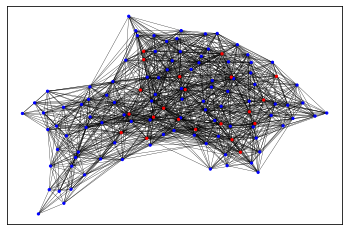

1d5r
9
k-core ratio: 0.68
Mean core number: 16.67
STD core number: 2.07
Mean core number SSP: 17.68
STD core number SSP: 0.47


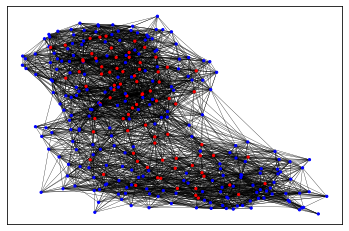

1nd4
9
k-core ratio: 0.51
Mean core number: 16.06
STD core number: 1.77
Mean core number SSP: 17.36
STD core number SSP: 0.73


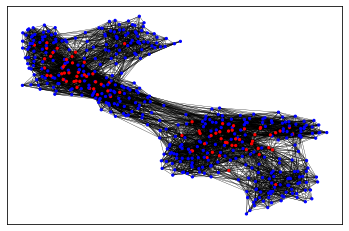

3dqw
9
k-core ratio: 0.85
Mean core number: 17.33
STD core number: 2.04
Mean core number SSP: 18.70
STD core number SSP: 0.79


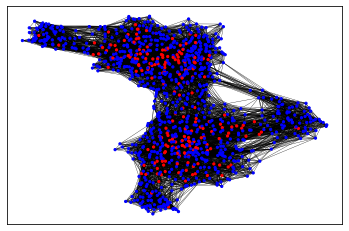

4bz3
9
k-core ratio: 0.99
Mean core number: 18.24
STD core number: 1.69
Mean core number SSP: 18.99
STD core number SSP: 0.10


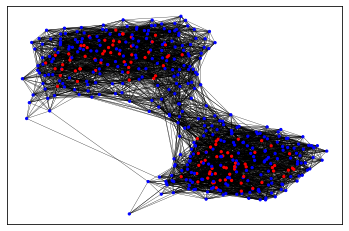

In [57]:
for protein in proteins:
    print(protein)

    pdb = os.path.join(pdb_path, f"{protein}.pdb")
    mol = bg.Pmolecule(pdb)
    G = mol.network(9)
    pos = nx.layout.spring_layout(G)

    for c in range(9, 10):
        G = mol.network(c)
        predictions = GetList(protein, 4, [1.5]*4, thresh=float(c))
        pred_nodes = [f"{chain.id}{x[3:]}" for x in predictions for chain in mol.model.child_list]
        nodes = list(G.nodes)
        node_color = ['red' if node in pred_nodes else "blue" for node in nodes]
        print(c)
        kcore_ratio = len(set(pred_nodes) & set(nx.core.k_core(G))) / len(set(pred_nodes))
        print(f"k-core ratio: {kcore_ratio:.2f}")
        core_number = nx.core_number(G)
        print(f"Mean core number: {np.mean([core_number[x] for x in nodes if x in core_number and x not in pred_nodes]):.2f}")
        print(f"STD core number: {np.std([core_number[x] for x in nodes if x in core_number and x not in pred_nodes]):.2f}")
        print(f"Mean core number SSP: {np.mean([core_number[x] for x in pred_nodes if x in core_number]):.2f}")
        print(f"STD core number SSP: {np.std([core_number[x] for x in pred_nodes if x in core_number]):.2f}")
        nx.draw_networkx(G, node_size=5, width=0.3, with_labels=False, pos=pos, node_color=node_color)
        plt.show()

1be9
9
k-core ratio: 0.47
Mean core number: 15.84
STD core number: 2.54
Mean core number FSP: 17.94
STD core number FSP: 0.24


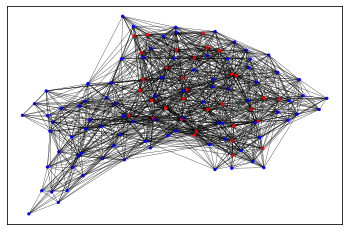

1d5r
9
k-core ratio: 0.75
Mean core number: 16.46
STD core number: 2.11
Mean core number FSP: 17.66
STD core number FSP: 0.99


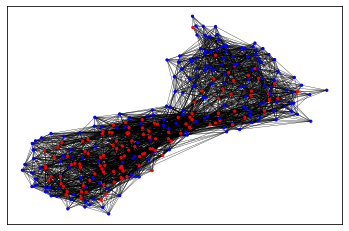

1nd4
9
k-core ratio: 0.42
Mean core number: 15.78
STD core number: 1.79
Mean core number FSP: 17.00
STD core number FSP: 1.26


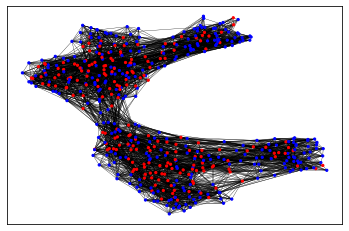

3dqw
9
k-core ratio: 0.58
Mean core number: 17.40
STD core number: 2.07
Mean core number FSP: 17.92
STD core number FSP: 1.66


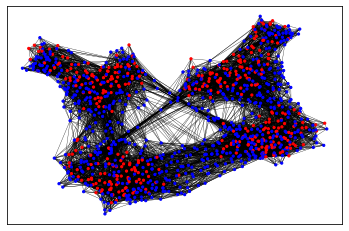

4bz3
9
k-core ratio: 0.97
Mean core number: 18.04
STD core number: 1.85
Mean core number FSP: 18.97
STD core number FSP: 0.16


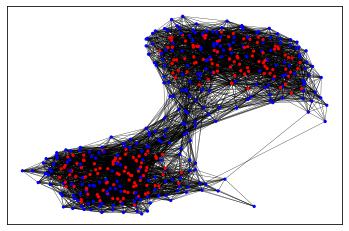

In [58]:
for protein in proteins:
    print(protein)

    pdb = os.path.join(pdb_path, f"{protein}.pdb")
    mol = bg.Pmolecule(pdb)
    G = mol.network(9)
    pos = nx.layout.spring_layout(G)

    for c in range(9, 10):
        G = mol.network(c)
        predictions = GetPercentage(0.4, "lowest",  functional_data[protein])
        pred_nodes = [f"{chain.id}{x[1:]}" for x in predictions for chain in mol.model.child_list]
        nodes = list(G.nodes)
        node_color = ['red' if node in pred_nodes else "blue" for node in nodes]
        print(c)
        kcore_ratio = len(set(pred_nodes) & set(nx.core.k_core(G))) / len(set(pred_nodes))
        print(f"k-core ratio: {kcore_ratio:.2f}")
        core_number = nx.core_number(G)
        print(f"Mean core number: {np.mean([core_number[x] for x in nodes if x in core_number and x not in pred_nodes]):.2f}")
        print(f"STD core number: {np.std([core_number[x] for x in nodes if x in core_number and x not in pred_nodes]):.2f}")
        print(f"Mean core number FSP: {np.mean([core_number[x] for x in pred_nodes if x in core_number]):.2f}")
        print(f"STD core number FSP: {np.std([core_number[x] for x in pred_nodes if x in core_number]):.2f}")
        nx.draw_networkx(G, node_size=5, width=0.3, with_labels=False, pos=pos, node_color=node_color)
        plt.show()